In [1]:
import pandas as pd

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/AkankshaKumari-akuu/fake-news-data/main/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/AkankshaKumari-akuu/fake-news-data/main/test.csv')

In [5]:
train_data = train.copy()
test_data = test.copy()

In [6]:
train_data.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [7]:
test_data.head(3)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...


In [8]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [9]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


In [10]:
test=test.fillna(' ')
train=train.fillna(' ')

In [11]:
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [12]:

test.head(3)

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...


In [13]:
train.head(3)

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...


In [14]:
print(train['label'])

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [15]:
train.columns

Index(['id', 'title', 'author', 'text', 'label', 'total'], dtype='object')

In [16]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id        0
title     0
author    0
text      0
label     0
total     0
dtype: int64
************
id        0
title     0
author    0
text      0
total     0
dtype: int64


# Creating Wordcloud Visuals

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS)

In [19]:
for val in train[train['label']==1].total:
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    real_words += " ".join(tokens)+" "

In [20]:
wordcloud = WordCloud(width = 500, height = 500, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(real_words)

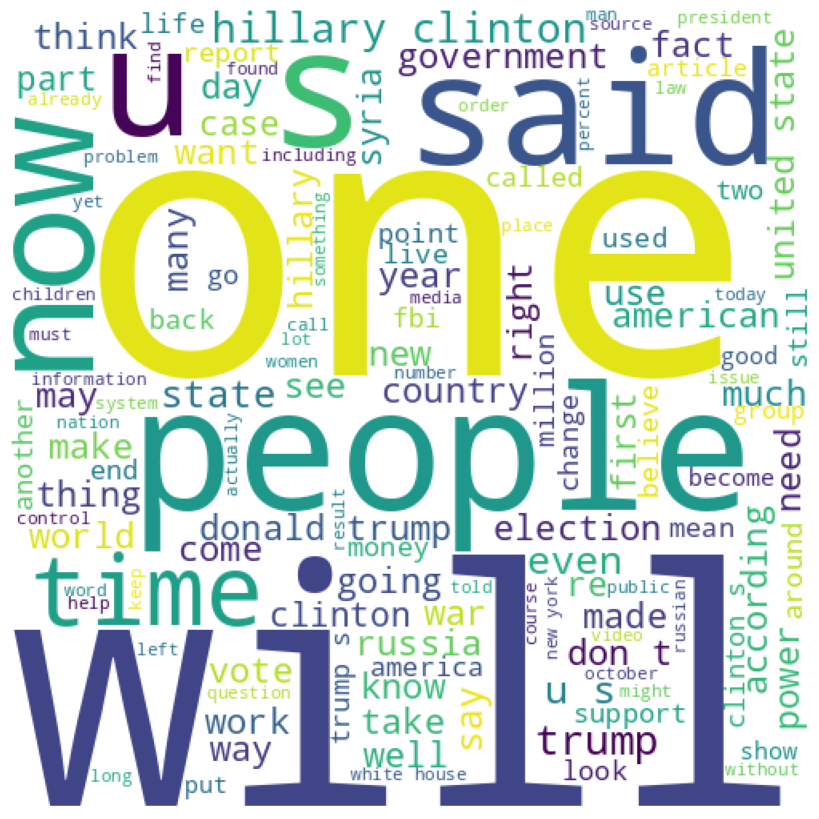

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [22]:
for val in train[train['label']==0].total:
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    fake_words += " ".join(tokens)+" "

In [23]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(fake_words)

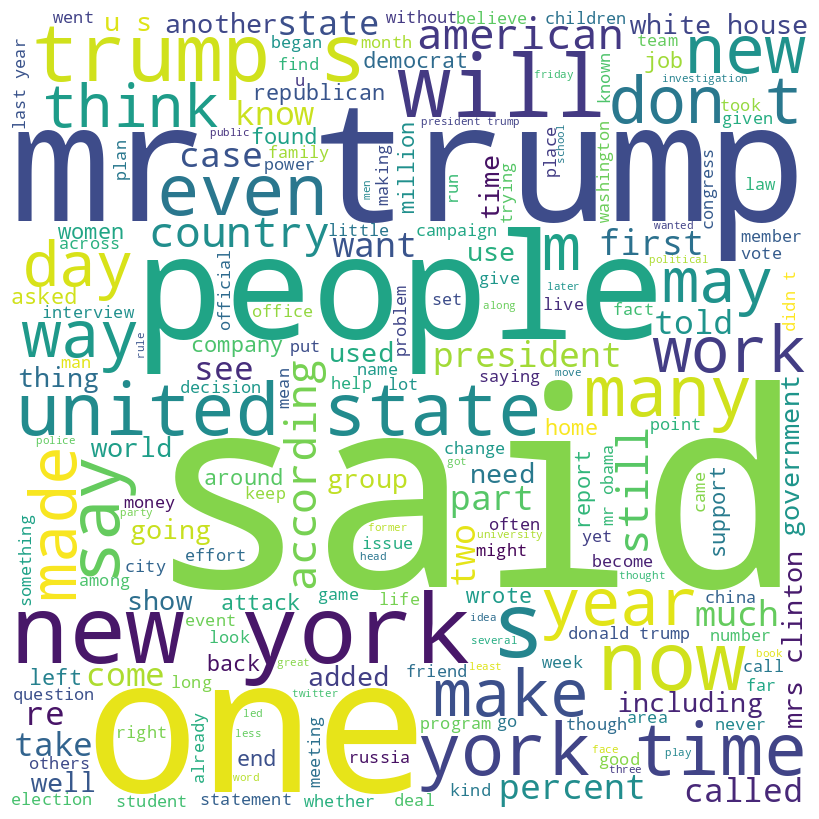

In [24]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Data Cleaning

In [25]:
#removing special characters from train["total"] row
import os
import re
import nltk

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [29]:
for index,row in train.iterrows():
    filter_sentence = ''

    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence)      #removal of special character.
    words = nltk.word_tokenize(sentence)           #tokenization
    words = [w for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    train.loc[index,'total'] = filter_sentence

In [30]:
train = train[['total','label']]

In [31]:
train.head(3)

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1


# Applying NLP Techniques

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
X_train = train['total']
Y_train = train['label']

In [34]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [35]:
tf_idf_matrix.shape

(20800, 220387)

# Now modelling


In [36]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

In [37]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [38]:
print(X_train.shape,X_test.shape)

(15600, 220387) (5200, 220387)


Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [40]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98


array([[2493,   71],
       [  44, 2592]])

MultinomialNB

In [41]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'.format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]])

DecisionTressClassifer

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(X_train, y_train)
pred= Adab.predict(X_test)
print('Accuracy of Adaboost classifier on training set: {:.2f}'.format(Adab.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'.format(Adab.score(X_test, y_test)))
cm= confusion_matrix(y_test,pred)
cm

Accuracy of Adaboost classifier on training set: 0.96
Accuracy of Adaboost classifier on test set: 0.96


array([[2432,  132],
       [  97, 2539]])